In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kumargh/pimaindiansdiabetescsv")

print("Path to dataset files:", path)


d:\DRIVE_PORTATIL2\Portatil2\Desktop\Personal\PLATZI\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 8.89k/8.89k [00:00<00:00, 9.01MB/s]

Extracting files...
Path to dataset files: C:\Users\rojas\.cache\kagglehub\datasets\kumargh\pimaindiansdiabetescsv\versions\1


In [7]:
df_diabetes = pd.read_csv(path+'/pima-indians-diabetes.csv')
df_diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [13]:
print(df_diabetes.sample(10))
print("")
print(df_diabetes.isnull().sum())

      6  148  72  35    0  33.6  0.627  50  1
684   2  129  74  26  205  33.2  0.591  25  0
192  11  135   0   0    0  52.3  0.578  40  1
139   3  128  78   0    0  21.1  0.268  55  0
691   2  121  70  32   95  39.1  0.886  23  0
490   2   89  90  30    0  33.5  0.292  42  0
110   8  155  62  26  495  34.0  0.543  46  1
169   6  102  82   0    0  30.8  0.180  36  1
697   4  127  88  11  155  34.5  0.598  28  0
640   4  128  70   0    0  34.3  0.303  24  0
250   2  129  84   0    0  28.0  0.284  27  0

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64


In [14]:
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [15]:
df_diabetes.shape

(767, 9)

In [17]:
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

In [25]:
X = df_diabetes.drop(['9. Class variable (0 or 1)'], axis=1)
y = df_diabetes['9. Class variable (0 or 1)']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state= 00000)

In [27]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

In [28]:
random_forest.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
y_predicted_train = random_forest.predict(X_train)
y_predicted_test = random_forest.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score

train_accuaracy = accuracy_score(y_train, y_predicted_train)
test_accuaracy = accuracy_score(y_test, y_predicted_test)

print("El accuracy en train es: ", train_accuaracy)

print("El accuracy en test es: ", test_accuaracy)

El accuracy en train es:  0.9850746268656716
El accuracy en test es:  0.7445887445887446


In [31]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), 'importance':random_forest.feature_importances_}).sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


C:\Users\rojas\AppData\Local\Temp\ipykernel_36552\306314679.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance, palette='Paired')


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'),
  Text(1, 0, '6. Body mass index (weight in kg/(height in m)^2)'),
  Text(2, 0, '8. Age (years)'),
  Text(3, 0, '7. Diabetes pedigree function'),
  Text(4, 0, '1. Number of times pregnant'),
  Text(5, 0, '3. Diastolic blood pressure (mm Hg)'),
  Text(6, 0, '4. Triceps skin fold thickness (mm)'),
  Text(7, 0, '5. 2-Hour serum insulin (mu U/ml)')])

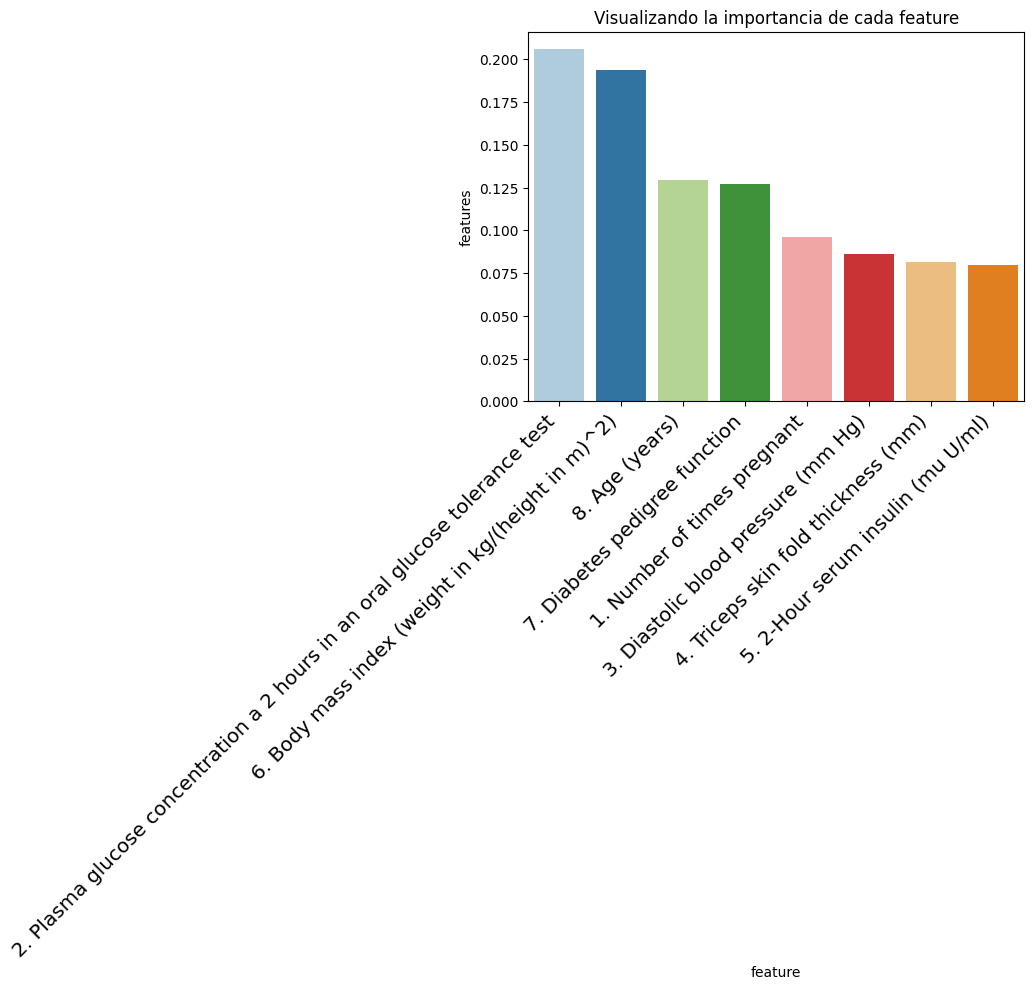

In [34]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance, palette='Paired')
plt.xlabel='Feature Importance Score'
plt.ylabel("features")
plt.title("Visualizando la importancia de cada feature")
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')